## Regularization

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of models. In simple terms, regularization adds a penalty term to the objective function being optimized during model training, encouraging the model to learn simpler patterns that are more likely to generalize well to unseen data.

The primary goal of regularization is to reduce the complexity of a model, which helps to prevent it from fitting the noise in the training data too closely. Overfitting occurs when a model learns to capture the noise and specific details of the training data, making it perform poorly on new, unseen data.

There are different types of regularization techniques, but they generally involve adding a penalty term to the loss function or objective function being minimized during training. The penalty term typically depends on some measure of the complexity of the model, such as the magnitude of the model parameters (coefficients) or the number of non-zero coefficients.

Two common types of regularization techniques are:

1. **L1 Regularization (Lasso)**: Adds a penalty term proportional to the absolute values of the model parameters. It encourages sparsity in the model, meaning it tends to produce models with fewer non-zero coefficients, effectively performing feature selection.

2. **L2 Regularization (Ridge)**: Adds a penalty term proportional to the square of the magnitude of the model parameters. It discourages large parameter values, leading to smoother models with smaller parameter estimates.

Regularization is a crucial tool in machine learning, especially when dealing with high-dimensional data or models with many parameters. It helps to strike a balance between fitting the training data well and generalizing effectively to new, unseen data, ultimately improving the model's performance and reliability.

## Ridge Regression

Ridge Regression, also known as Tikhonov regularization or L2 regularization, is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) objective function. This penalty term is proportional to the square of the magnitude of the coefficients. The goal of Ridge Regression is to shrink the coefficients towards zero, reducing their variance and making the model more robust to multicollinearity.

Mathematically, Ridge Regression minimizes the following objective function:

![](formula.png)

The Ridge Regression objective consists of two terms:
1. The sum of squared errors (SSE) term, which measures the difference between the observed and predicted values.
2. The regularization term, which penalizes the magnitude of the coefficients.

The regularization parameter α controls the trade-off between fitting the data well (minimizing SSE) and keeping the coefficients small (minimizing the regularization term). A larger α leads to more shrinkage of the coefficients, effectively reducing model complexity and increasing bias but decreasing variance.

Ridge Regression is particularly useful when dealing with multicollinear features, where the features are highly correlated with each other. In such cases, ordinary least squares estimation can lead to large variance in the coefficient estimates, while Ridge Regression can mitigate this issue by shrinking the coefficients.

## Refer this video

[![Video Thumbnail](https://img.youtube.com/vi/aEow1QoTLo0/0.jpg)](https://youtu.be/aEow1QoTLo0?si=Hus6vqWWBb9wGnUj)


In [1]:
# In loss function the lamda (hyperparameter) and m square (slope) is added as the penalty

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
print('R2 Score',r2_score(y_test, y_pred) * 100)

R2 Score 51.88113124539249


In [11]:
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 48.72713760953253


In [12]:
from sklearn.linear_model import Ridge
ri = Ridge(alpha=0.1)

In [13]:
ri.fit(X_train, y_train)

Ridge(alpha=0.1)

In [14]:
ypred = ri.predict(X_test)

In [15]:
print('R2 Score',r2_score(y_test, ypred) * 100)
print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))

R2 Score 52.08421054129915
RMSE 48.62420568515607


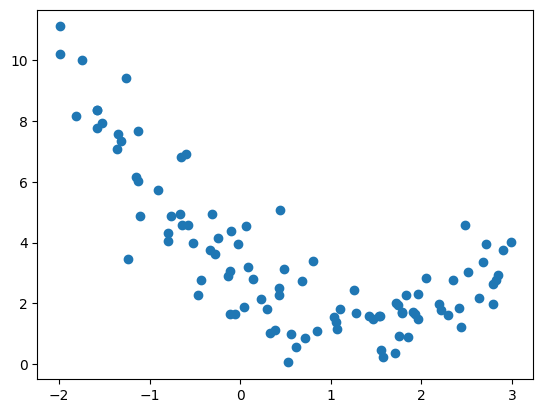

In [16]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

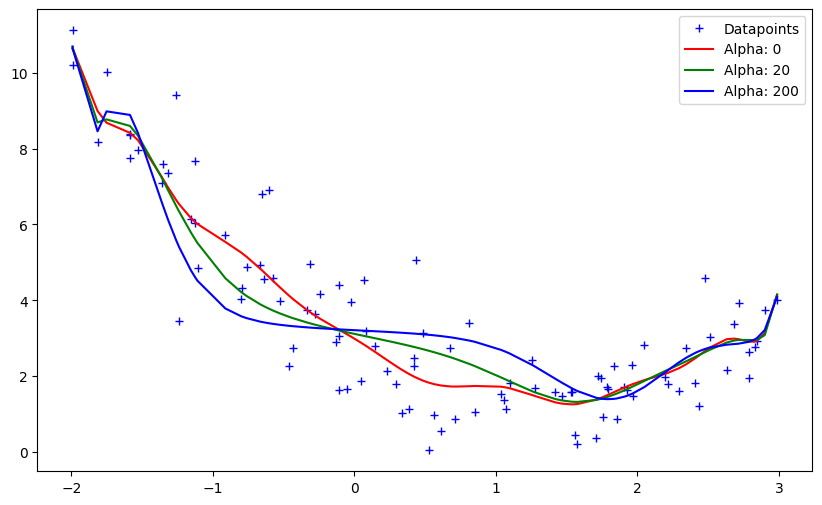

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()